In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
from itertools import combinations

In [6]:
df = pd.read_csv(r'Historical Crypto Prices', index_col=0)
df.index = pd.to_datetime(df.index)
df

,Bitcoin,Binance,Cardano,Ethereum,Solana,XRP
Date,,,,,,
2020-07-13,9243.6,18.42,0.1244,239.73,1.279,0.1987
2020-07-14,9253.4,18.09,0.1324,240.50,1.115,0.1991
2020-07-15,9198.7,17.63,0.1306,238.62,1.383,0.1972
2020-07-21,9387.3,17.72,0.1231,245.53,1.004,0.1995
2020-07-22,9513.7,18.10,0.1238,263.28,1.046,0.2036
...,...,...,...,...,...,...
2024-12-07,99837.0,749.46,1.2105,3996.24,238.379,2.4936
2024-12-08,101115.8,741.84,1.1933,4002.91,237.097,2.6037
2024-12-09,97359.4,690.02,1.0068,3718.98,217.012,2.2191


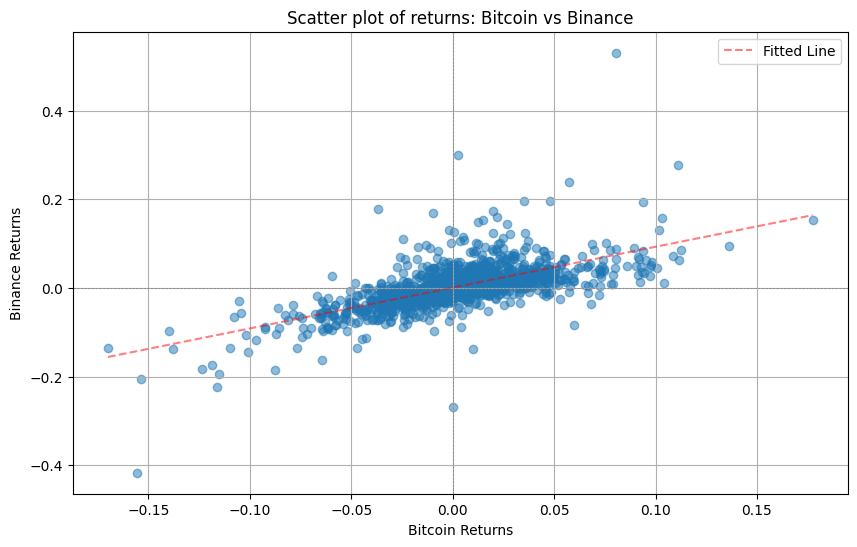

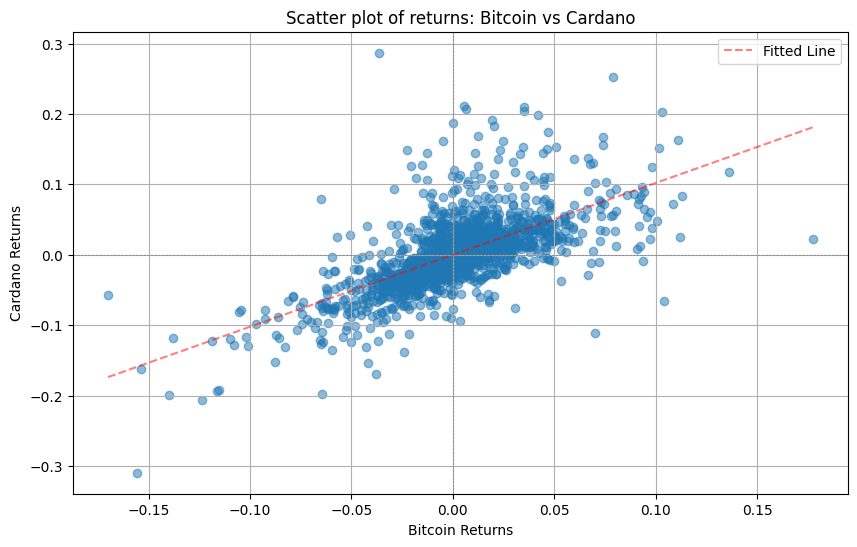

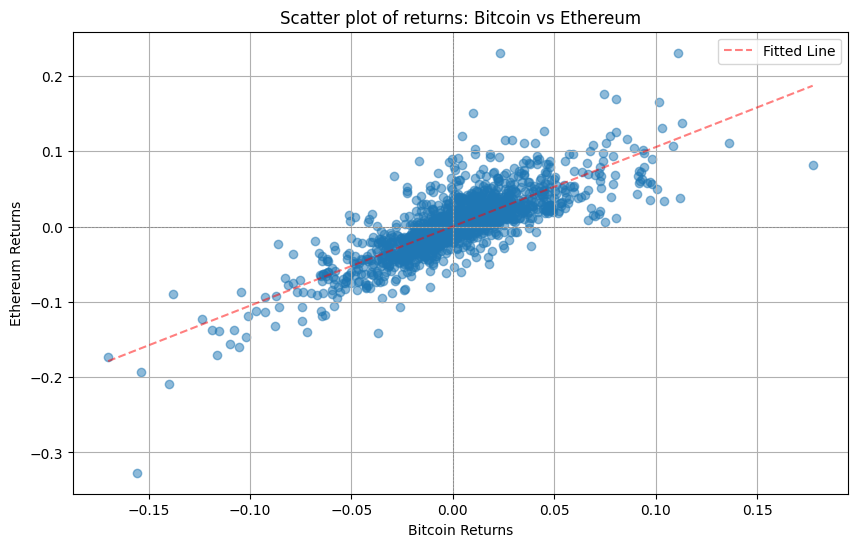

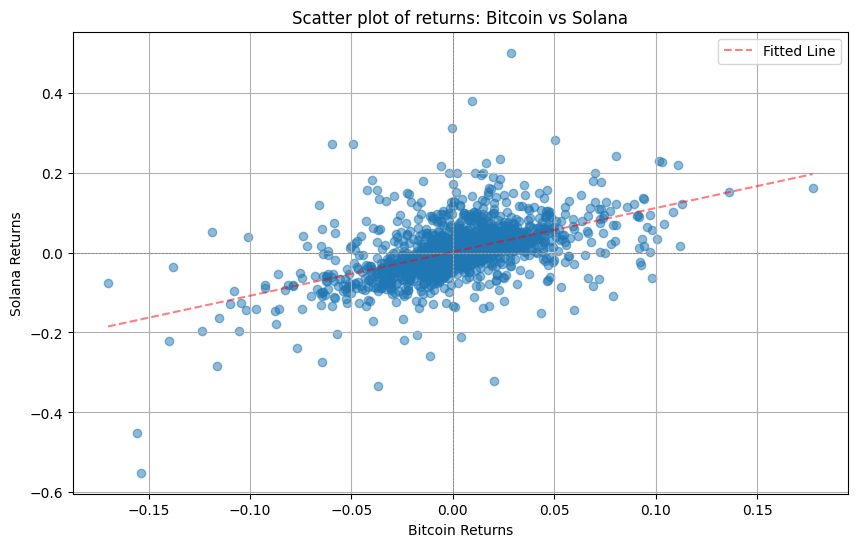

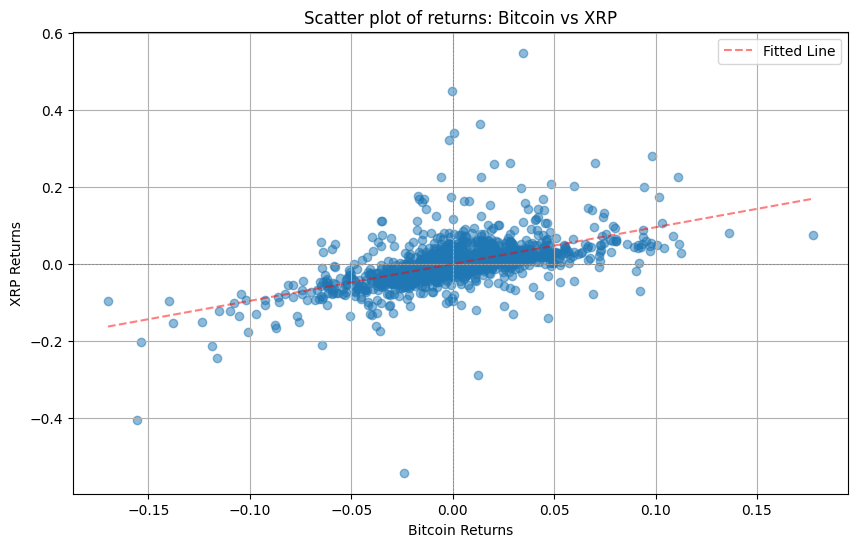

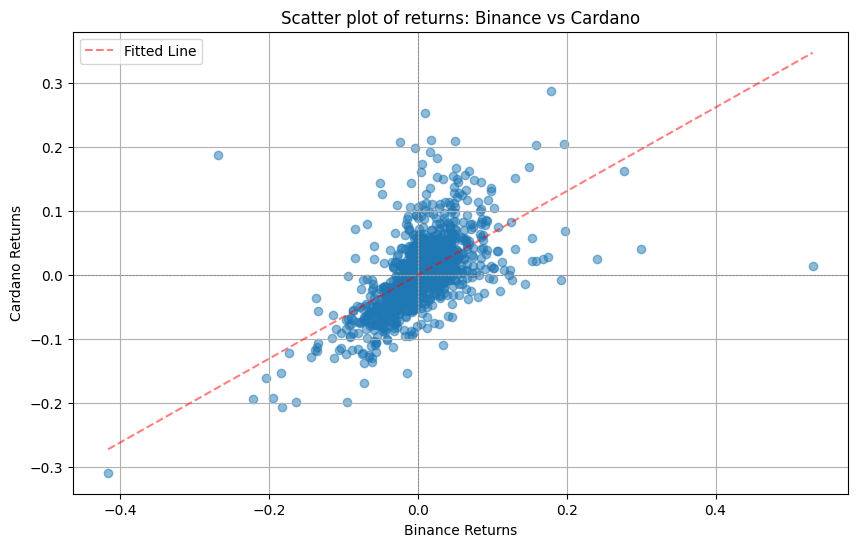

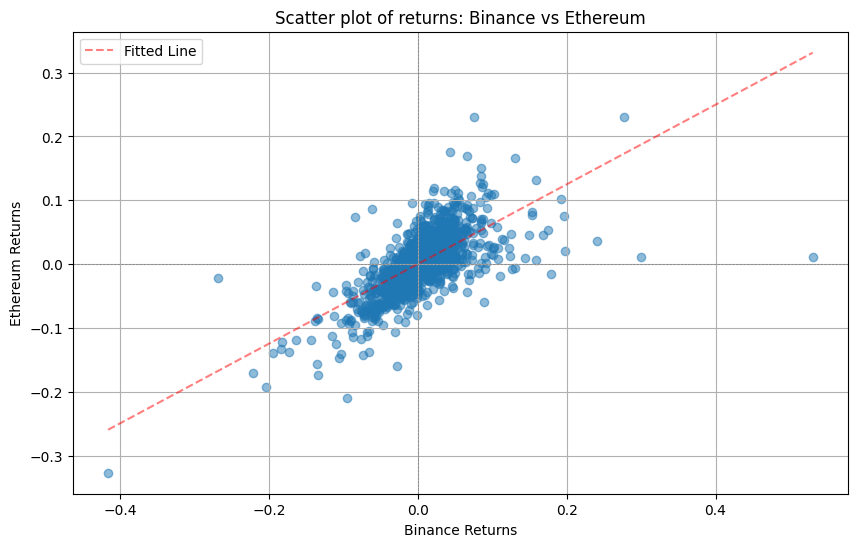

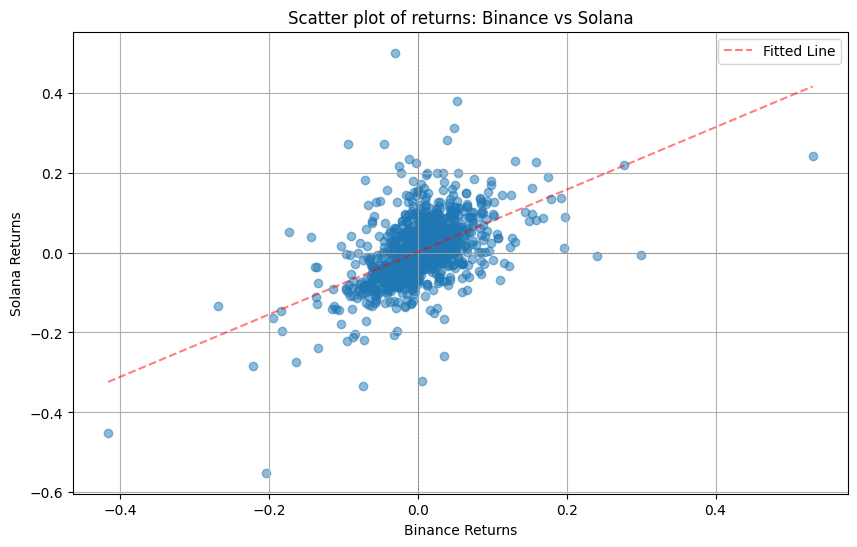

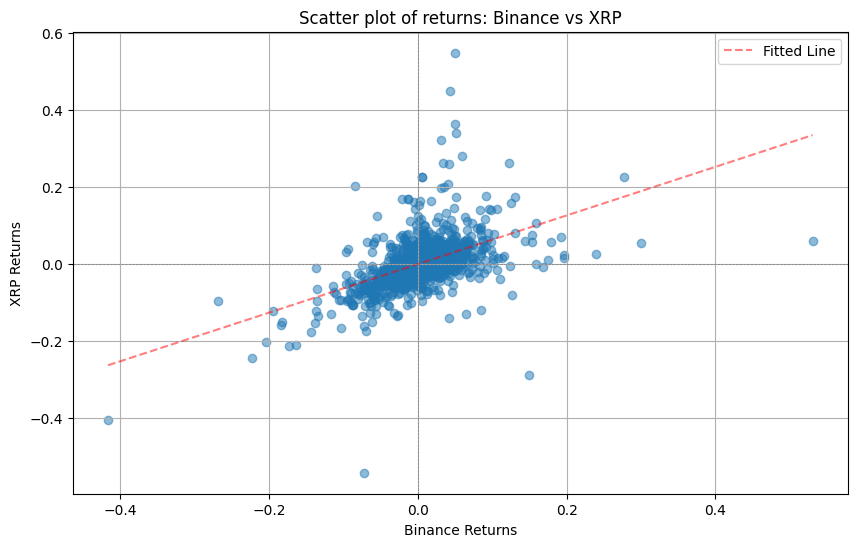

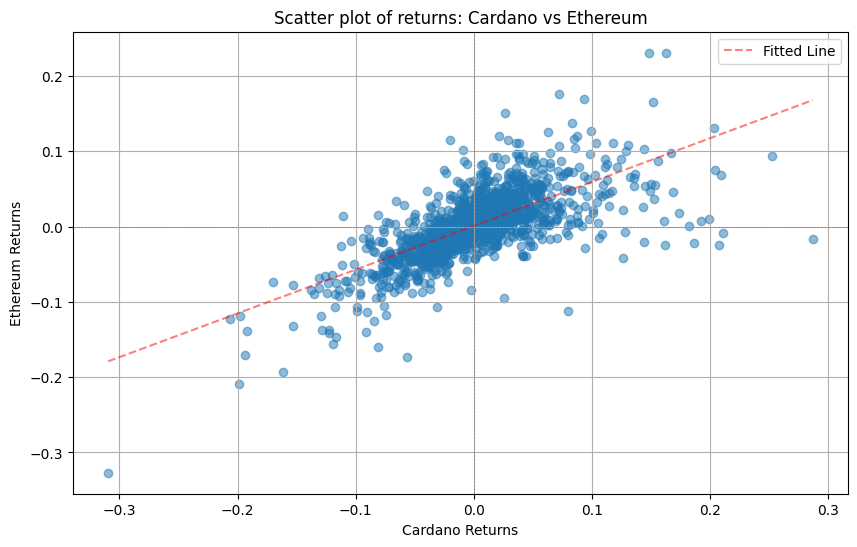

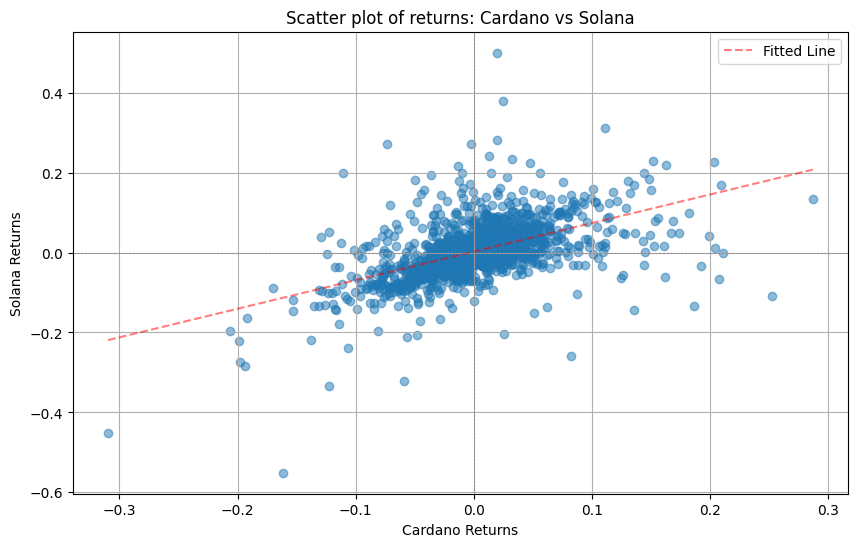

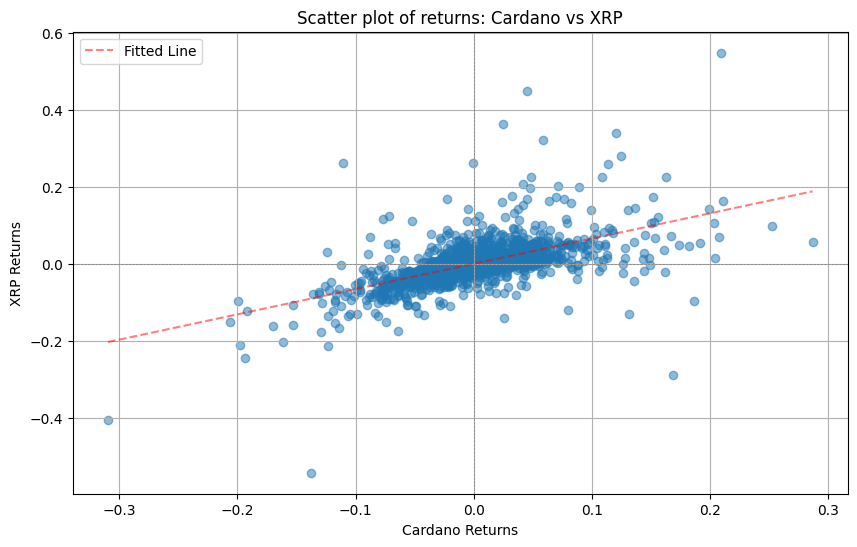

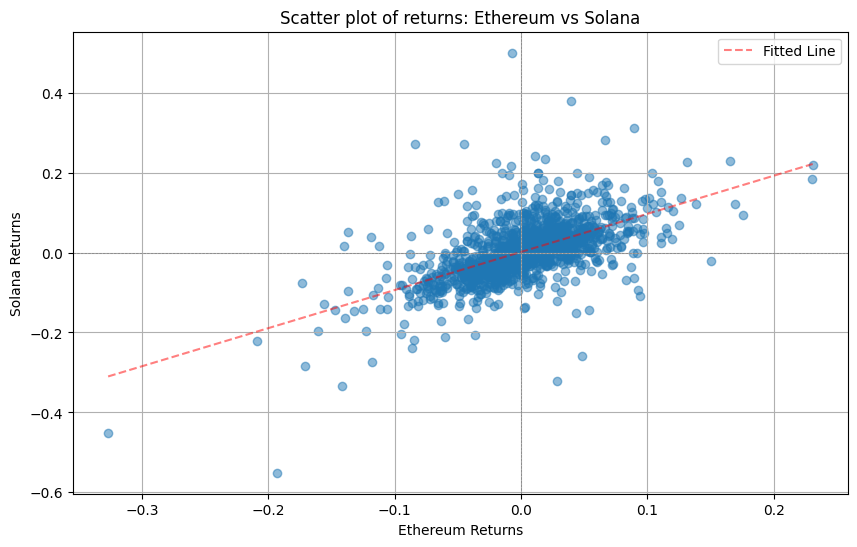

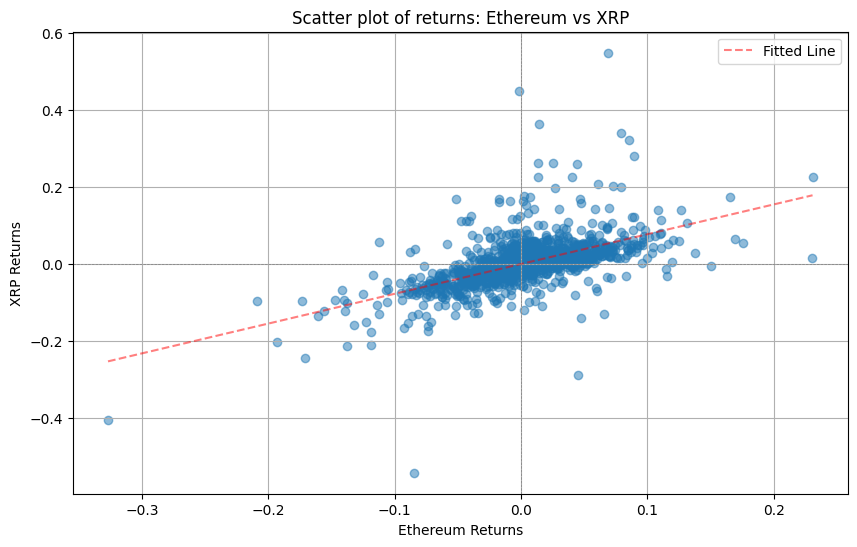

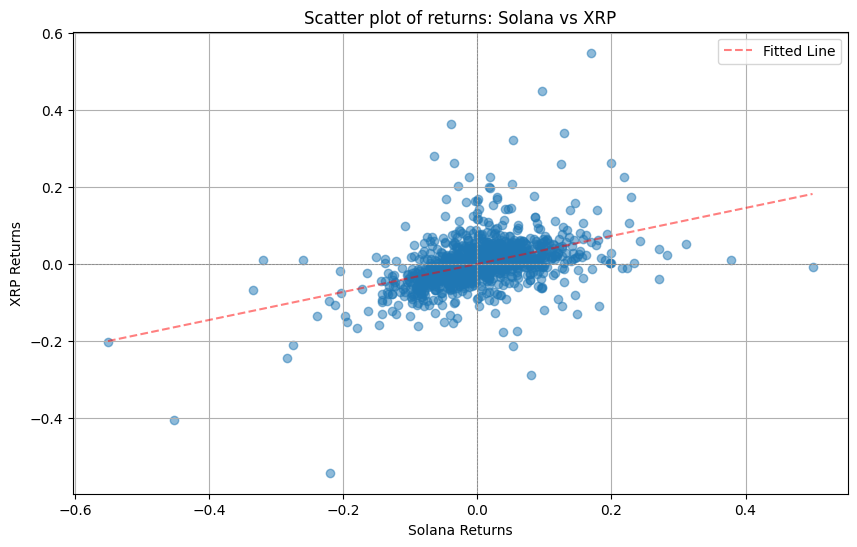

,Asset 1,Asset 2,R^2,Slope,P_value,Standard Error
0,Bitcoin,Binance,0.422634,0.920529,2.562430e-193,0.026881
1,Bitcoin,Cardano,0.426029,1.021317,2.264934e-195,0.029618
2,Bitcoin,Ethereum,0.650922,1.052678,0.000000e+00,0.019260
3,Bitcoin,Solana,0.270166,1.097084,1.060883e-111,0.045051
4,Bitcoin,XRP,0.298392,0.953715,1.920004e-125,0.036538
5,Binance,Cardano,0.351041,0.654733,1.296048e-152,0.022241
6,Binance,Ethereum,0.458280,0.623795,1.668784e-215,0.016945
7,Binance,Solana,0.274198,0.780552,1.244343e-113,0.031728
8,Binance,XRP,0.261130,0.630084,2.058315e-107,0.026480
9,Cardano,Ethereum,0.486175,0.581416,6.587554e-234,0.014934


In [7]:
log_returns = np.log(df / df.shift())[1:]

results = []

for asset1, asset2 in combinations(df.columns, 2):
    asset1_returns = log_returns[asset1]
    asset2_returns = log_returns[asset2]

    slope, intercept, r_value, p_value, std_err = linregress(asset1_returns, asset2_returns)

    results.append({
        'Asset 1': asset1,
        'Asset 2': asset2,
        'R^2': r_value ** 2,
        'Slope': slope,
        'P_value': p_value,
        'Standard Error': std_err
    })

    x_values = np.linspace(asset1_returns.min(), asset1_returns.max(), 100)
    y_values= slope * x_values + intercept

    plt.figure(figsize=(10, 6))
    plt.scatter(asset1_returns, asset2_returns, alpha=0.5)
    plt.plot(x_values, y_values, color='red', label='Fitted Line', linestyle='dashed', alpha=0.5)
    plt.title(f'Scatter plot of returns: {asset1} vs {asset2}')
    plt.xlabel(f'{asset1} Returns')
    plt.ylabel(f'{asset2} Returns')
    plt.axhline(0, color='gray', linewidth=0.5, linestyle='--')
    plt.axvline(0, color='gray', linewidth=0.5, linestyle='--')
    plt.grid()
    plt.legend()
    plt.show()

results_df = pd.DataFrame(results)
results_df

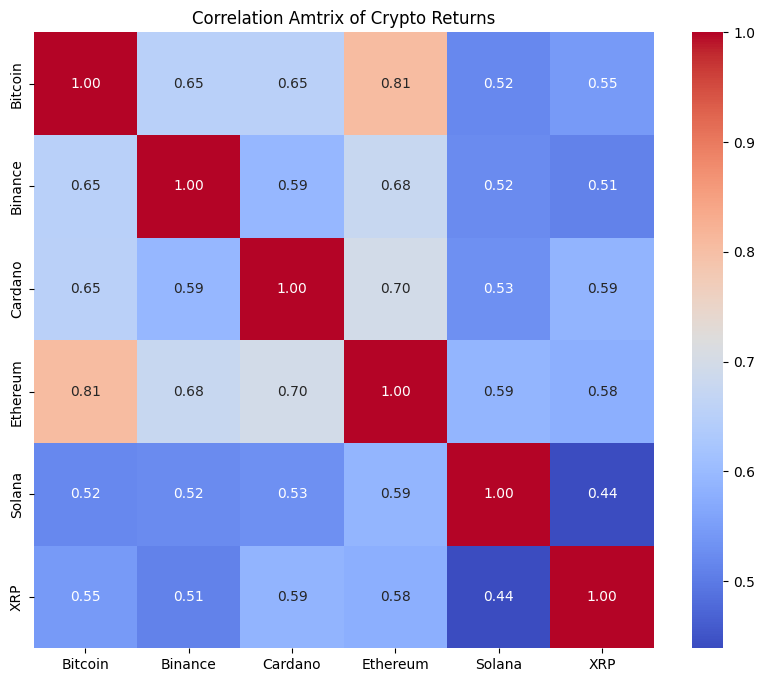

In [9]:
import seaborn as sns

correlation_matrix = log_returns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    cbar=True
)

plt.title("Correlation Amtrix of Crypto Returns")
plt.show()